In [ ]:
pip install azure-storage-blob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.8/392.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
from azure.storage.blob import BlobServiceClient

# Your Azure Blob Storage account name and account key
account_name = 'ilab9788543873'
account_key = 'TAyrrfaiCQ86vkgSXyStufowrMVdk4T45mVw6TNcFFJocR6pTXy6ZMSUUTeeh5FpNTsBVAbVqdwk+AStHA3x1g=='

# Connect to your Blob Storage account
blob_service_client = BlobServiceClient(account_url=f"https://ilab9788543873.blob.core.windows.net", credential=account_key)

# Name of the container you want to access
container_name = 'azureml'
container_client = blob_service_client.get_container_client(container_name)

# List all blobs (files) in the container
blobs = container_client.list_blobs()
for blob in blobs:
    print(blob.name)

10k_lens.json
ComputeRecord/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/compute_record.txt
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver/stderr
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/driver/stdout
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-92238893.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-e5612677.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/librarymanager/vm-e8544025.log
ExperimentRun/dcid.bceb8578-0ea6-4a32-818a-08e431d48e79/logs/azureml/livy
output.json


In [ ]:
import json
from azure.storage.blob import BlobServiceClient

# Set up the BlobServiceClient with your account info
account_name = 'ilab9788543873'
account_key = 'TAyrrfaiCQ86vkgSXyStufowrMVdk4T45mVw6TNcFFJocR6pTXy6ZMSUUTeeh5FpNTsBVAbVqdwk'

container_name = 'azureml'
blob_name = '10k_lens.json'

blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

# Assuming you've already connected to the blob service client and container client
blob_client = container_client.get_blob_client(blob=blob_name)

# Try to download the blob content
try:
    downloaded_blob = blob_client.download_blob()
    data = downloaded_blob.readall()
    data_str = data.decode('utf-8')
    print("Blob content:", data_str[:1000])  # Print the first 1000 characters of the blob
except Exception as e:
    print("Error occurred:", e)

Blob content: [{"lens_id": "188-042-825-946-495", "jurisdiction": "US", "doc_number": "20230284427", "kind": "A1", "date_published": "2023-09-07", "lang": "en", "biblio": {"publication_reference": {"jurisdiction": "US", "doc_number": "20230284427", "kind": "A1", "date": "2023-09-07"}, "application_reference": {"jurisdiction": "US", "doc_number": "17686241", "date": "2022-03-03"}, "priority_claims": {}, "invention_title": [{"text": "SRAM WITH P-TYPE ACCESS TRANSISTORS AND COMPLEMENTARY FIELD-EFFECT TRANSISTOR TECHNOLOGY"}], "parties": {"applicants": [{"extracted_name": {"value": "Intel Corporation"}}], "inventors": [{"extracted_name": {"value": "Charles AUGUSTINE"}}, {"extracted_name": {"value": "Seenivasan SUBRAMANIAM"}}, {"extracted_name": {"value": "Patrick MORROW"}}, {"extracted_name": {"value": "Muhammad M. KHELLAH"}}]}, "classifications_cpc": {"classifications": [{"symbol": "H01L27/1104"}, {"symbol": "G11C11/412"}, {"symbol": "G11C11/419"}]}, "cited_by": {}}, "legal_status": {"pat

In [ ]:
import pandas as pd
import json

# Convert the JSON string to a list of dictionaries
data_list = json.loads(data_str)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Display the first row
print(df.iloc[0])

# Identify columns with nested data
nested_cols = [col for col in df.columns if isinstance(df[col].iloc[0], (dict, list))]
print("\nNested columns:", nested_cols)

lens_id                                         188-042-825-946-495
jurisdiction                                                     US
doc_number                                              20230284427
kind                                                             A1
date_published                                           2023-09-07
lang                                                             en
biblio            {'publication_reference': {'jurisdiction': 'US...
legal_status                           {'patent_status': 'UNKNOWN'}
abstract          [{'text': 'Embodiments herein relate to scalin...
claims            [{'claims': [{'claim_text': ['1 . An apparatus...
description       {'text': 'FIELD The present application genera...
Name: 0, dtype: object

Nested columns: ['biblio', 'legal_status', 'abstract', 'claims', 'description']


In [ ]:
def unnest_dataframe(df):
    """
    Recursively unnest columns with dictionary type until no more such columns exist.
    """
    while any(df[col].apply(lambda x: isinstance(x, dict)).any() for col in df):
        for column in df.columns:
            if df[column].apply(lambda x: isinstance(x, dict)).any():
                # Unnest the column
                temp_df = df[column].apply(pd.Series)
                temp_df.columns = [f"{column}_{subcol}" for subcol in temp_df.columns]

                # Drop the original column and concat the new columns
                df = df.drop(column, axis=1)
                df = pd.concat([df, temp_df], axis=1)

    return df

# Apply the function to the DataFrame
df = unnest_dataframe(df)

Streaming output truncated to the last 5000 lines.
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-input-5-7ab2db456f78>:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp_df = df[column].apply(pd.Series)
<ipython-

In [ ]:
# Display the first row again to see the changes
print(df.iloc[0])

lens_id                                                                     188-042-825-946-495
jurisdiction                                                                                 US
doc_number                                                                          20230284427
kind                                                                                         A1
date_published                                                                       2023-09-07
lang                                                                                         en
abstract                                      [{'text': 'Embodiments herein relate to scalin...
claims                                        [{'claims': [{'claim_text': ['1 . An apparatus...
biblio_invention_title                        [{'text': 'SRAM WITH P-TYPE ACCESS TRANSISTORS...
legal_status_patent_status                                                              UNKNOWN
legal_status_granted                    

In [ ]:
# Define a function to concatenate all texts from a list of dictionaries with 'text' key
def concatenate_texts_from_list(data):
    texts = []
    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict) and 'text' in item:
                texts.append(item['text'])
    return ' '.join(texts)

# Identify columns with lists that contain dictionaries with a 'text' key
columns_with_text_list = ['abstract', 'biblio_invention_title']

# Concatenate texts for the identified columns
for col in columns_with_text_list:
    new_col_name = f"{col}_text"
    df[new_col_name] = df[col].apply(concatenate_texts_from_list)

# For 'claims' column, extract all claim texts and concatenate them
def concatenate_all_claim_texts(claims):
    claim_texts = []
    if isinstance(claims, list):
        for claim in claims:
            if isinstance(claim, dict) and 'claims' in claim:
                for sub_claim in claim['claims']:
                    if isinstance(sub_claim, dict) and 'claim_text' in sub_claim:
                        claim_texts.extend(sub_claim['claim_text'])
    return ' '.join(claim_texts)

df['all_claim_texts'] = df['claims'].apply(concatenate_all_claim_texts)

In [ ]:
# Define a function to extract 'value' from 'extracted_name' key in a list of dictionaries
def extract_values_from_extracted_name(data):
    values = []
    if isinstance(data, list):
        for item in data:
            if isinstance(item, dict) and 'extracted_name' in item and 'value' in item['extracted_name']:
                values.append(item['extracted_name']['value'])
    return ', '.join(values)

# List of columns to apply the above function
cols_to_extract = ['biblio_parties_applicants', 'biblio_parties_inventors']

# Apply the function to the columns
for col in cols_to_extract:
    new_col_name = f"{col}_names"
    df[new_col_name] = df[col].apply(extract_values_from_extracted_name)

In [ ]:
# Extract 'symbol' values from each dictionary in the list and join them into a single string
df['biblio_classifications_cpc_symbols'] = df['biblio_classifications_cpc_classifications'].apply(lambda x: ', '.join([i['symbol'] for i in x]) if isinstance(x, list) else None)

In [ ]:
# List of columns to drop
cols_to_drop = ['abstract', 'claims', 'biblio_invention_title', 'biblio_parties_applicants', 'biblio_parties_inventors', 'biblio_classifications_cpc_classifications']

# Drop columns
df = df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
# Display the first row again to see the changes
print(df.iloc[0])

lens_id                                                                     188-042-825-946-495
jurisdiction                                                                                 US
doc_number                                                                          20230284427
kind                                                                                         A1
date_published                                                                       2023-09-07
lang                                                                                         en
legal_status_patent_status                                                              UNKNOWN
legal_status_granted                                                                        NaN
legal_status_grant_date                                                                     NaN
description_text                              FIELD The present application generally relate...
description_0                           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   lens_id                                     10000 non-null  object 
 1   jurisdiction                                10000 non-null  object 
 2   doc_number                                  10000 non-null  object 
 3   kind                                        10000 non-null  object 
 4   date_published                              10000 non-null  object 
 5   lang                                        10000 non-null  object 
 6   legal_status_patent_status                  10000 non-null  object 
 7   legal_status_granted                        3669 non-null   object 
 8   legal_status_grant_date                     3645 non-null   object 
 9   description_text                            1959 non-null   object 
 10  description

Total & Pending Patents

In [ ]:
# Iterate through patents and print their patent_status values
for index, row in df.iterrows():
    patent_status = row['legal_status_patent_status']
    if patent_status.lower() == "pending":
        print(f"Patent Status: {patent_status}")

Streaming output truncated to the last 5000 lines.
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent Status: PENDING
Patent

In [ ]:
pending_count = df[df['legal_status_patent_status'].str.lower() == 'pending'].shape[0]

print(f"Total Pending Patents: {pending_count}")

Total Pending Patents: 5990


In [ ]:
import pandas as pd
pending_counts_by_jurisdiction = df[df['legal_status_patent_status'].str.lower() == 'pending']\
    .groupby('jurisdiction').size().reset_index(name='pending_count')

# Display the pending counts by jurisdiction
print(pending_counts_by_jurisdiction)

   jurisdiction  pending_count
0            AU             52
1            CA             36
2            CN           4198
3            CR              2
4            EP            308
5            ES              1
6            FI              4
7            GB             34
8            GR              1
9            HU              4
10           IL             21
11           JP             20
12           KR            247
13           LT              1
14           NL              3
15           PL             16
16           PT              2
17           RO             11
18           TW             31
19           US            636
20           WO            362


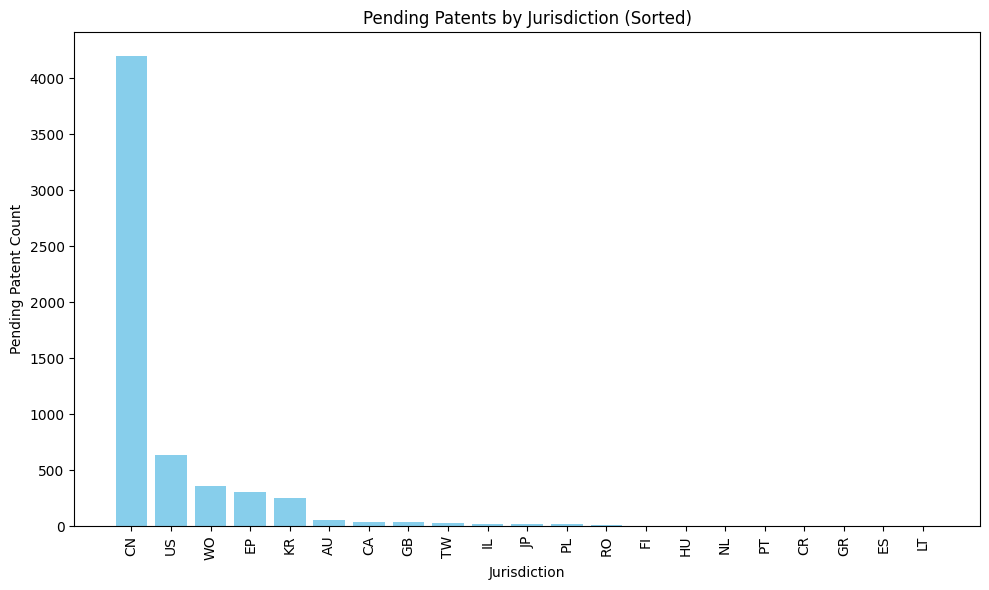

In [ ]:
import matplotlib.pyplot as plt
# Sort the DataFrame by 'pending_count' in descending order
sorted_pending_counts = pending_counts_by_jurisdiction.sort_values(by='pending_count', ascending=False)

# Extract jurisdiction names and counts for plotting
jurisdictions = sorted_pending_counts['jurisdiction']
counts = sorted_pending_counts['pending_count']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(jurisdictions, counts, color='skyblue')
plt.xlabel('Jurisdiction')
plt.ylabel('Pending Patent Count')
plt.title('Pending Patents by Jurisdiction (Sorted)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the bar graph
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
total_counts_by_jurisdiction = df['jurisdiction'].value_counts().reset_index()
total_counts_by_jurisdiction.columns = ['Jurisdiction', 'Total Patents']

# Display the total counts by jurisdiction
print(total_counts_by_jurisdiction)


   Jurisdiction  Total Patents
0            CN           6756
1            US           1393
2            KR            591
3            EP            435
4            WO            367
5            TW             84
6            AU             72
7            ZA             64
8            GB             42
9            CA             36
10           JP             24
11           NL             24
12           IL             21
13           PL             18
14           LU             13
15           RO             13
16           SA              5
17           LT              5
18           FI              5
19           MY              5
20           HU              5
21           CZ              3
22           SI              3
23           ES              3
24           PT              2
25           NO              2
26           IE              2
27           CR              2
28           SK              1
29           JO              1
30           GR              1
31      

In [ ]:
total_patents = total_counts_by_jurisdiction['Total Patents']

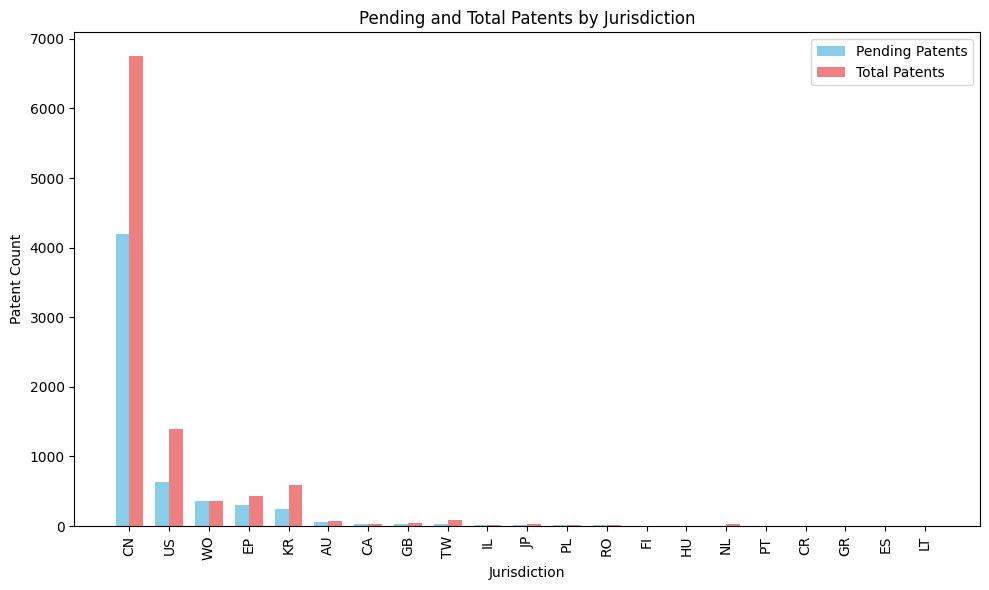

In [ ]:
import numpy as np

jurisdictions = sorted_pending_counts['jurisdiction']
pending_counts = sorted_pending_counts['pending_count']
total_counts = total_counts_by_jurisdiction['Total Patents']

# Create dictionaries for pending counts and total counts for all jurisdictions
pending_counts_dict = dict(zip(jurisdictions, pending_counts))
total_counts_dict = dict(zip(total_counts_by_jurisdiction['Jurisdiction'], total_counts))

# Create arrays for all jurisdictions with counts, filling in zeros for missing counts
all_jurisdictions = jurisdictions  # This should be a list of all jurisdictions you have
pending_counts_aligned = np.array([pending_counts_dict.get(jurisdiction, 0) for jurisdiction in all_jurisdictions])
total_counts_aligned = np.array([total_counts_dict.get(jurisdiction, 0) for jurisdiction in all_jurisdictions])

# Define the width of the bars
bar_width = 0.35

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(all_jurisdictions))
plt.bar(x - bar_width/2, pending_counts_aligned, bar_width, label='Pending Patents', color='skyblue')
plt.bar(x + bar_width/2, total_counts_aligned, bar_width, label='Total Patents', color='lightcoral')

# Set x-axis labels and title
plt.xlabel('Jurisdiction')
plt.ylabel('Patent Count')
plt.title('Pending and Total Patents by Jurisdiction')

# Set x-axis tick positions and labels
plt.xticks(x, all_jurisdictions, rotation=90)  # Use all_jurisdictions instead of jurisdictions

# Add a legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


Top patents cited by others

In [ ]:
import pandas as pd

# Count patents cited by others
cited_by_others_count = df[df['biblio_cited_by_patent_count'] > 0].shape[0]

# Print the count
print(f"Number of Patents Cited by Others: {cited_by_others_count}")

Number of Patents Cited by Others: 435


In [ ]:
# Sort the DataFrame by 'biblio_cited_by_patent_count' in descending order
sorted_df = df.sort_values(by='biblio_cited_by_patent_count', ascending=False)

# Select the top 30 patents
top_30_cited_patents = sorted_df.head(30)

# Display only the applicants and their counts
top_30_titles_and_counts = top_30_cited_patents[['biblio_parties_applicants_names', 'jurisdiction', 'biblio_cited_by_patent_count']]

# Print the top 30 titles and counts
print(top_30_titles_and_counts)

                        biblio_parties_applicants_names jurisdiction  \
9135                                         INTEL CORP           US   
5768                                         INTEL CORP           US   
7262                                         INTEL CORP           US   
9986                     HUAPU KEYI BEIJING TECH CO LTD           CN   
7624                                      KC HOLDINGS I           US   
6175                                   DELL PRODUCTS LP           US   
3240                                         INTEL CORP           US   
8052                     FUJIAN ZHONGRUI NETWORK CO LTD           CN   
4286  STATE GRID ZHEJIANG ELECTRIC POWER CO LTD JIAS...           CN   
9582                                         INTEL CORP           US   
5930  ZHANGZHOU ELECTRIC POWER SUPPLY CO OF STATE GR...           CN   
9146                     ACCENTURE GLOBAL SOLUTIONS LTD           US   
7310              SHENZHEN QINLIN SCIENCE & TECH CO LTD         

In [ ]:
import pandas as pd
from tabulate import tabulate

# Sort the DataFrame by 'biblio_cited_by_patent_count' in descending order
sorted_df = df.sort_values(by='biblio_cited_by_patent_count', ascending=False)

# Select the top 30 patents
top_30_cited_patents = sorted_df.head(30)

# Extract the relevant data for the table
top_30_titles_and_counts = top_30_cited_patents[['biblio_parties_applicants_names', 'jurisdiction', 'biblio_cited_by_patent_count']]

# Rename columns for clarity
top_30_titles_and_counts.columns = ['Applicant', 'Jurisdiction', 'Citation Count']

# Convert the DataFrame to a list of dictionaries for tabulate
table_data = top_30_titles_and_counts.to_dict(orient='records')

# Display the table
table = tabulate(table_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+------------------------------------------------------------------------------------------------------------------------------------------+--------------+----------------+
|                                                                Applicant                                                                 | Jurisdiction | Citation Count |
+------------------------------------------------------------------------------------------------------------------------------------------+--------------+----------------+
|                                                                INTEL CORP                                                                |      US      |      13.0      |
|                                                                INTEL CORP                                                                |      US      |      6.0       |
|                                                                INTEL CORP                                                            

In [ ]:
import pandas as pd
from tabulate import tabulate

# Sort the DataFrame by 'biblio_cited_by_patent_count' in descending order
sorted_df = df.sort_values(by='biblio_cited_by_patent_count', ascending=False)

# Select the top 30 patents
top_30_cited_patents = sorted_df.head(30)

# Extract the relevant data for the table
top_30_titles_and_counts = top_30_cited_patents[['biblio_parties_applicants_names', 'jurisdiction', 'biblio_cited_by_patent_count']]

# Group by applicants and calculate the total citation count for each applicant
applicants_with_total_count = top_30_titles_and_counts.groupby('biblio_parties_applicants_names').agg(
    {'jurisdiction': 'first', 'biblio_cited_by_patent_count': 'sum'}).reset_index()

# Rename columns for clarity
applicants_with_total_count.columns = ['Applicant', 'Jurisdiction', 'Total Citation Count']

# Sort the DataFrame by 'Total Citation Count' in descending order
applicants_with_total_count = applicants_with_total_count.sort_values(by='Total Citation Count', ascending=False)

# Convert the DataFrame to a list of dictionaries for tabulate
table_data = applicants_with_total_count.to_dict(orient='records')

# Display the table
table = tabulate(table_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)


+------------------------------------------------------------------------------------------------------------------------------------------+--------------+----------------------+
|                                                                Applicant                                                                 | Jurisdiction | Total Citation Count |
+------------------------------------------------------------------------------------------------------------------------------------------+--------------+----------------------+
|                                                                INTEL CORP                                                                |      US      |         40.0         |
|                                                                SPLUNK INC                                                                |      US      |         6.0          |
|                                                             DELL PRODUCTS LP                           

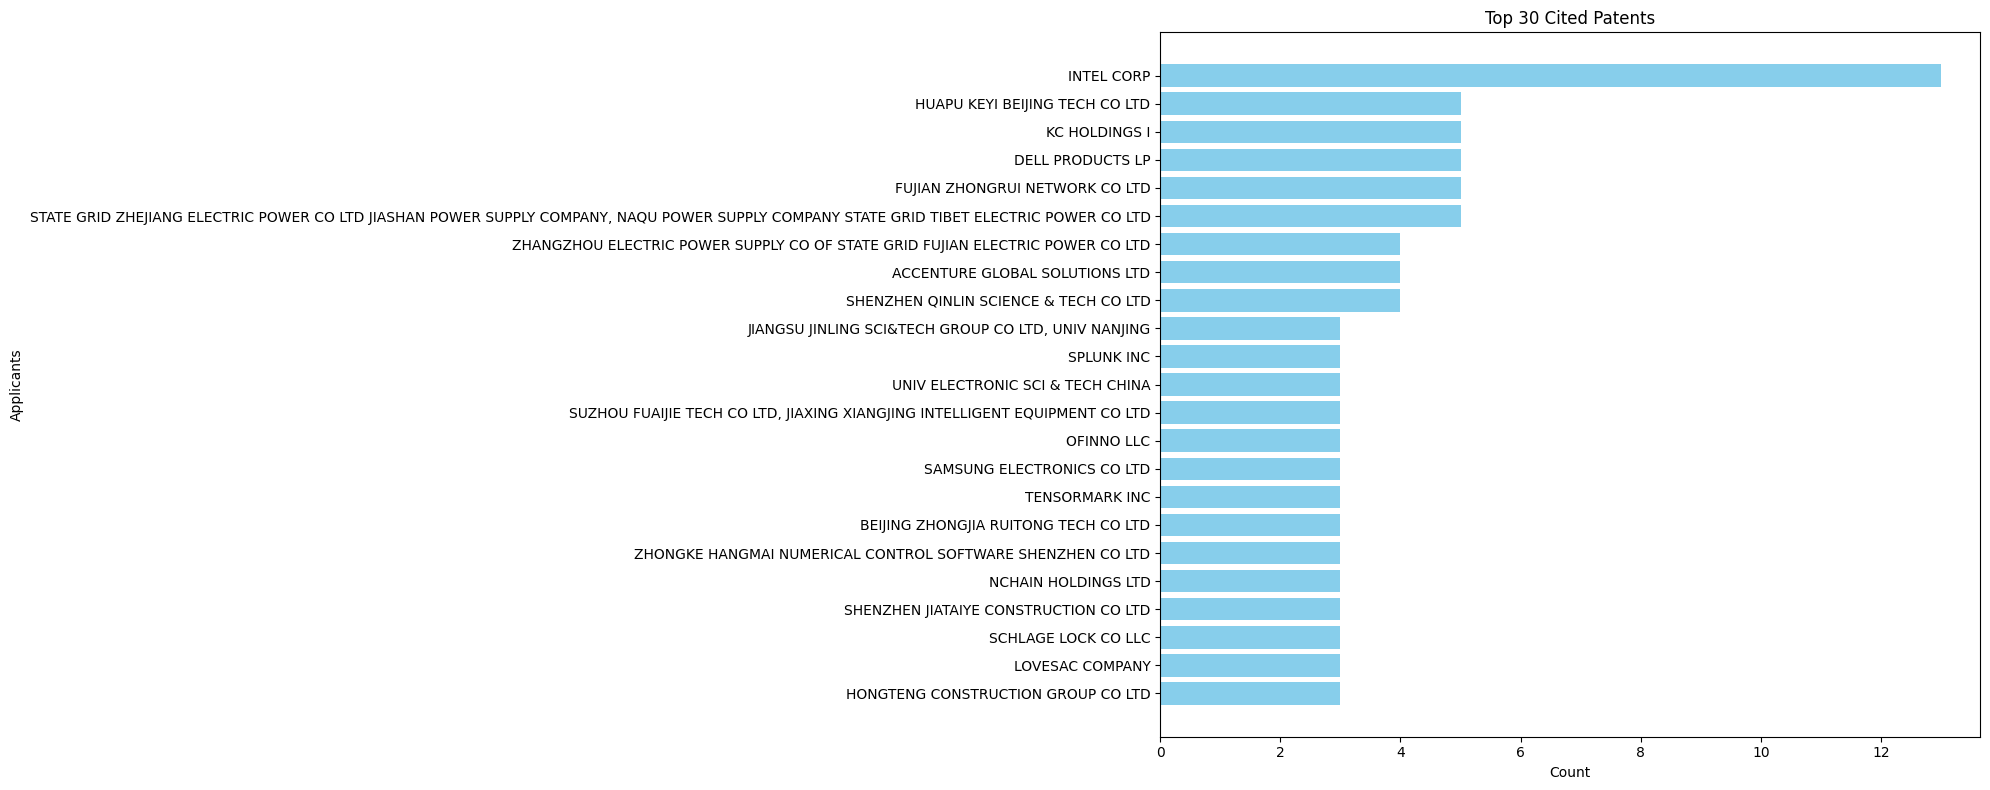

In [ ]:
# Display only the titles and their counts
top_30_titles_and_counts = top_30_cited_patents[['biblio_parties_applicants_names', 'biblio_cited_by_patent_count']]

# Create a bar graph
plt.figure(figsize=(20, 8))
plt.barh(top_30_titles_and_counts['biblio_parties_applicants_names'], top_30_titles_and_counts['biblio_cited_by_patent_count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Applicants')
plt.title('Top 30 Cited Patents')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Display the bar graph
plt.tight_layout()
plt.show()

<ipython-input-25-068375256394>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


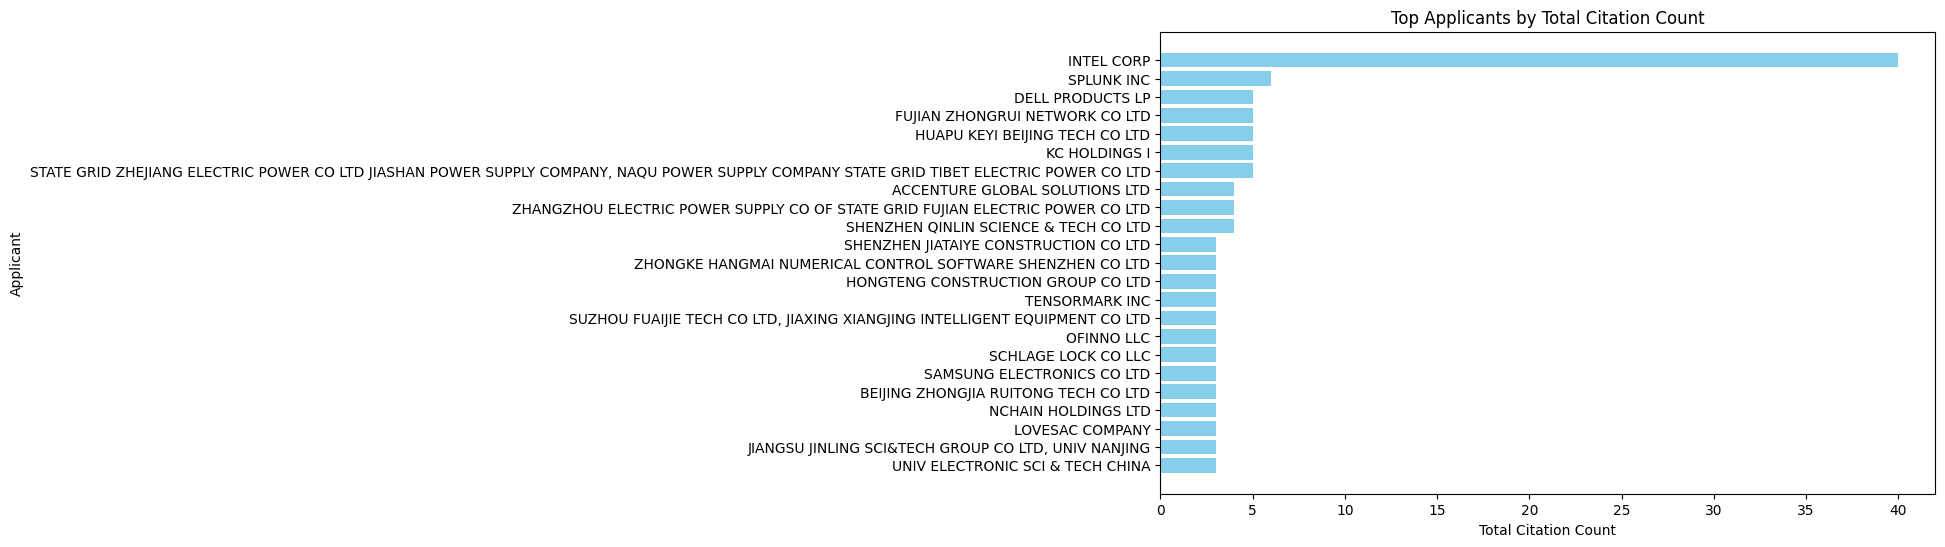

In [ ]:
# Sort the DataFrame by 'Total Citation Count' in ascending order
applicants_with_total_count = applicants_with_total_count.sort_values(by='Total Citation Count', ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(applicants_with_total_count['Applicant'], applicants_with_total_count['Total Citation Count'], color='skyblue')
plt.xlabel('Total Citation Count')
plt.ylabel('Applicant')
plt.title('Top Applicants by Total Citation Count')

# Display the chart
plt.tight_layout()
plt.show()

Claim Counts

In [ ]:
df['all_claim_texts'].head(1)

0    1 . An apparatus, comprising: a first n-type r...
Name: all_claim_texts, dtype: object

In [ ]:
import re

# Define a regular expression pattern to match claim numbers (e.g., "1.", "2.", etc.)
claim_pattern = r'\d+\.'

# Function to count claims in a text
def count_claims(text):
    claims = re.findall(claim_pattern, text)
    return len(claims)

# Apply the count_claims function to each row in the DataFrame
df['claim_count'] = df['all_claim_texts'].apply(count_claims)

# Sort the DataFrame by 'claim_count' in descending order
sorted_df = df.sort_values(by='claim_count', ascending=False)

# Print the sorted DataFrame with lens_id and claim_count columns
print(sorted_df[['lens_id', 'claim_count']])

                  lens_id  claim_count
3770  177-784-333-021-465          402
6561  187-437-160-483-130          324
4766  189-427-484-299-35X          163
194   011-348-443-607-634          134
1523  095-083-411-026-866          127
...                   ...          ...
3715  023-616-187-646-864            0
3716  029-866-305-288-958            0
3717  047-893-957-242-871            0
3718  059-298-904-385-595            0
9999  098-471-941-510-739            0

[10000 rows x 2 columns]


In [ ]:
# Calculate the average claim count
average_claim_count = df['claim_count'].mean()

# Print the average claim count
print(f"Average Claim Count: {average_claim_count:.2f}")

Average Claim Count: 1.94


In [ ]:
# Filter the DataFrame to exclude rows with 0 claims
filtered_df = df[df['claim_count'] > 0]

# Calculate the average claim count for the filtered DataFrame
average_claim_count = filtered_df['claim_count'].mean()

# Print the average claim count
print(f"Average Claim Count (After Removing 0s): {average_claim_count:.2f}")

Average Claim Count (After Removing 0s): 18.36


In [ ]:
sorted_df = df.sort_values(by='claim_count', ascending=False)

# Select the top 20 claims
top_20_claims = sorted_df.head(20)

# Create a table with 'invention_title' and 'claim_count' columns
top_20_claims_table = top_20_claims[['biblio_parties_applicants_names', 'claim_count', 'jurisdiction']]

# Print the table
print(top_20_claims_table)

                        biblio_parties_applicants_names  claim_count  \
3770                                        BIONTECH SE          402   
6561                                 NAGPAL SUMIT KUMAR          324   
4766                                   APREO HEALTH INC          163   
194   WAVE LIFE SCIENCES LTD, KANDASAMY PACHAMUTHU, ...          134   
1523                                          APPLE INC          127   
4467                           SHERLOCK BIOSCIENCES INC          100   
1996                            UNIV TEXAS, ERISYON INC           90   
834                                        QUALCOMM INC           90   
1566                                DEUTSCHE TELEKOM AG           87   
940                                         BIONTECH SE           82   
2605                                    ARTEMA LABS INC           77   
4737                                  VERSUM MAT US LLC           69   
1091                                KALINDHA RASHMI LLC         

In [ ]:
# Sort the DataFrame by 'biblio_cited_by_patent_count' in descending order
sorted_df = df.sort_values(by='claim_count', ascending=False)

# Select the top 30 patents
top_20_claims = sorted_df.head(20)

# Extract the relevant data for the table
top_20_claims_table = top_20_claims[['biblio_parties_applicants_names', 'jurisdiction', 'claim_count']]

# Rename columns for clarity
top_20_claims_table.columns = ['Applicant', 'Jurisdiction', 'Claims Count']

# Convert the DataFrame to a list of dictionaries for tabulate
table_data = top_20_claims_table.to_dict(orient='records')

# Display the table
table = tabulate(table_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+--------------+
|                                                                                    Applicant                                                                                    | Jurisdiction | Claims Count |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+--------------+
|                                                                                   BIONTECH SE                                                                                   |      WO      |     402      |
|                                                                               NAGPAL SUMIT KUMAR                                                              

<ipython-input-32-bde12b0151f5>:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


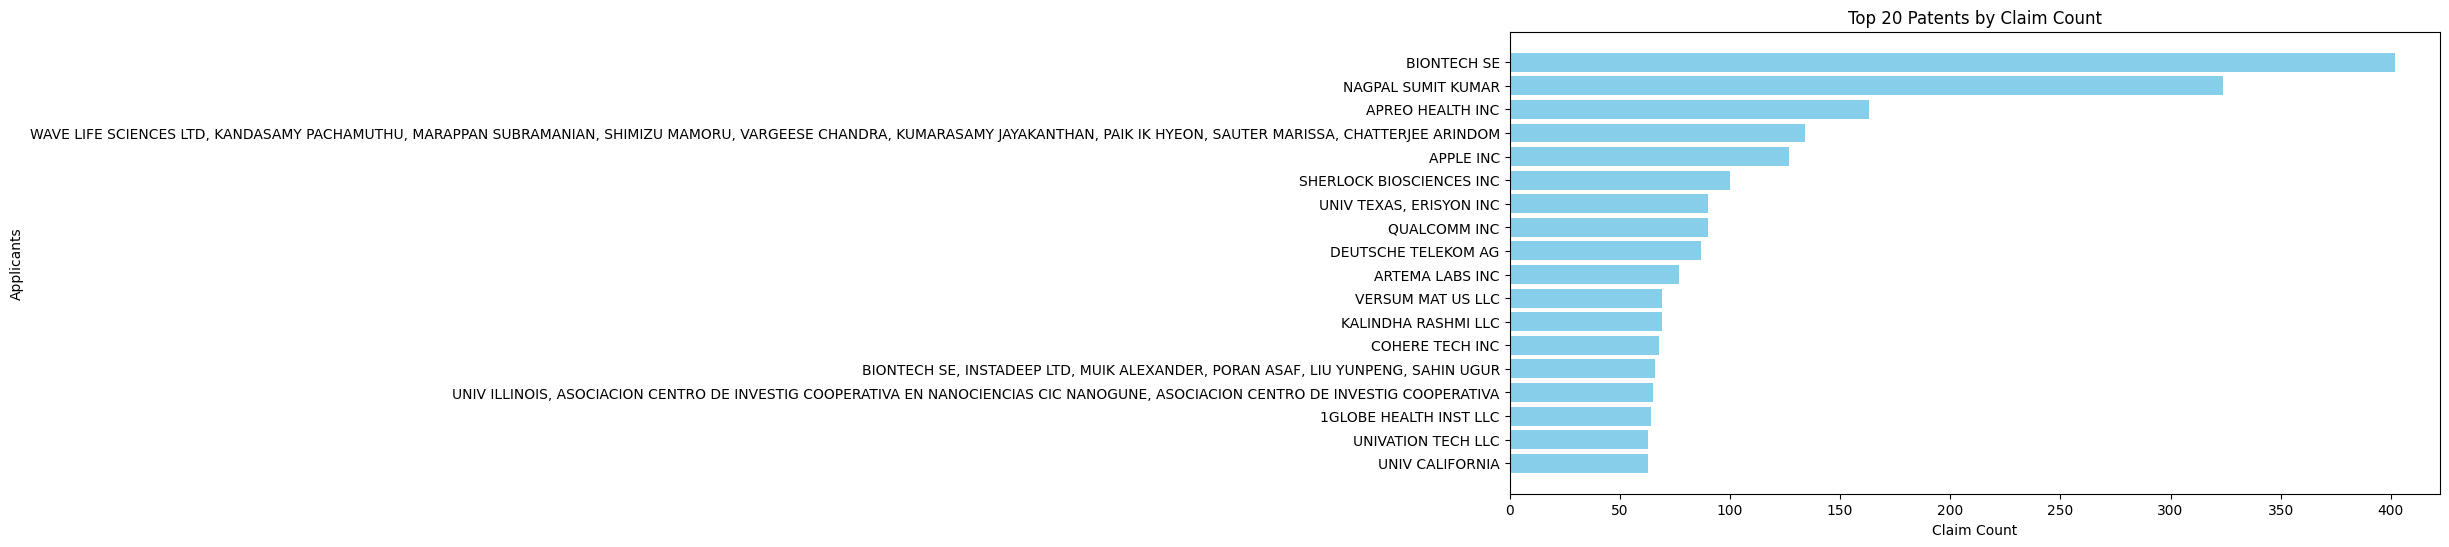

In [ ]:
# Create lists for claims and their counts
claims = top_20_claims['biblio_parties_applicants_names']
claim_counts = top_20_claims['claim_count']

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(claims, claim_counts, color='skyblue')
plt.xlabel('Claim Count')
plt.ylabel('Applicants')
plt.title('Top 20 Patents by Claim Count')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top

# Display the bar chart
plt.tight_layout()
plt.show()


Clustering

In [ ]:
import pandas as pd

# Filter patents from the year 2023
df_2023 = df[df['date_published'].str.startswith('2023')]

# Filter for English language patents ('en' in the 'lang' column)
english_patents = df_2023[df_2023['lang'] == 'en']

# Display the filtered DataFrame
print(filtered_df)

                  lens_id jurisdiction   doc_number kind date_published lang  \
15    114-654-979-060-542           WO   2023167466   A1     2023-09-07   ko   
120   078-689-406-633-047           NL      2034738    A     2023-08-25   en   
189   188-357-073-583-623           US  20230260107   A1     2023-08-17   en   
232   077-227-332-979-068           US     11723586   B2     2023-08-15   en   
235   086-373-718-962-869           US     11723595   B2     2023-08-15   en   
...                   ...          ...          ...  ...            ...  ...   
5607  152-143-046-152-57X           CN    115589692    A     2023-01-10   zh   
5673  013-859-258-343-988           CN    115575755    A     2023-01-06   zh   
5772  112-757-956-904-377           WO   2023277586   A1     2023-01-05   ko   
5936  106-623-251-911-39X           CN    115561825    A     2023-01-03   zh   
5965  135-138-022-736-375           CN    115564689    A     2023-01-03   zh   

     legal_status_patent_status legal_s

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample abstracts (replace with your actual abstracts)
abstracts = filtered_df['abstract_text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(abstracts)

# Calculate pairwise cosine similarity
similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print the pairwise similarity matrix
print("Pairwise Similarity Matrix:")
print(similarities)

Pairwise Similarity Matrix:
[[1.         0.05409588 0.06544563 ... 0.4847732  0.05270727 0.05358782]
 [0.05409588 1.         0.31282917 ... 0.12499272 0.23354476 0.30464256]
 [0.06544563 0.31282917 1.         ... 0.10589788 0.23825678 0.28593256]
 ...
 [0.4847732  0.12499272 0.10589788 ... 1.         0.06797399 0.15700782]
 [0.05270727 0.23354476 0.23825678 ... 0.06797399 1.         0.18802743]
 [0.05358782 0.30464256 0.28593256 ... 0.15700782 0.18802743 1.        ]]


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seab

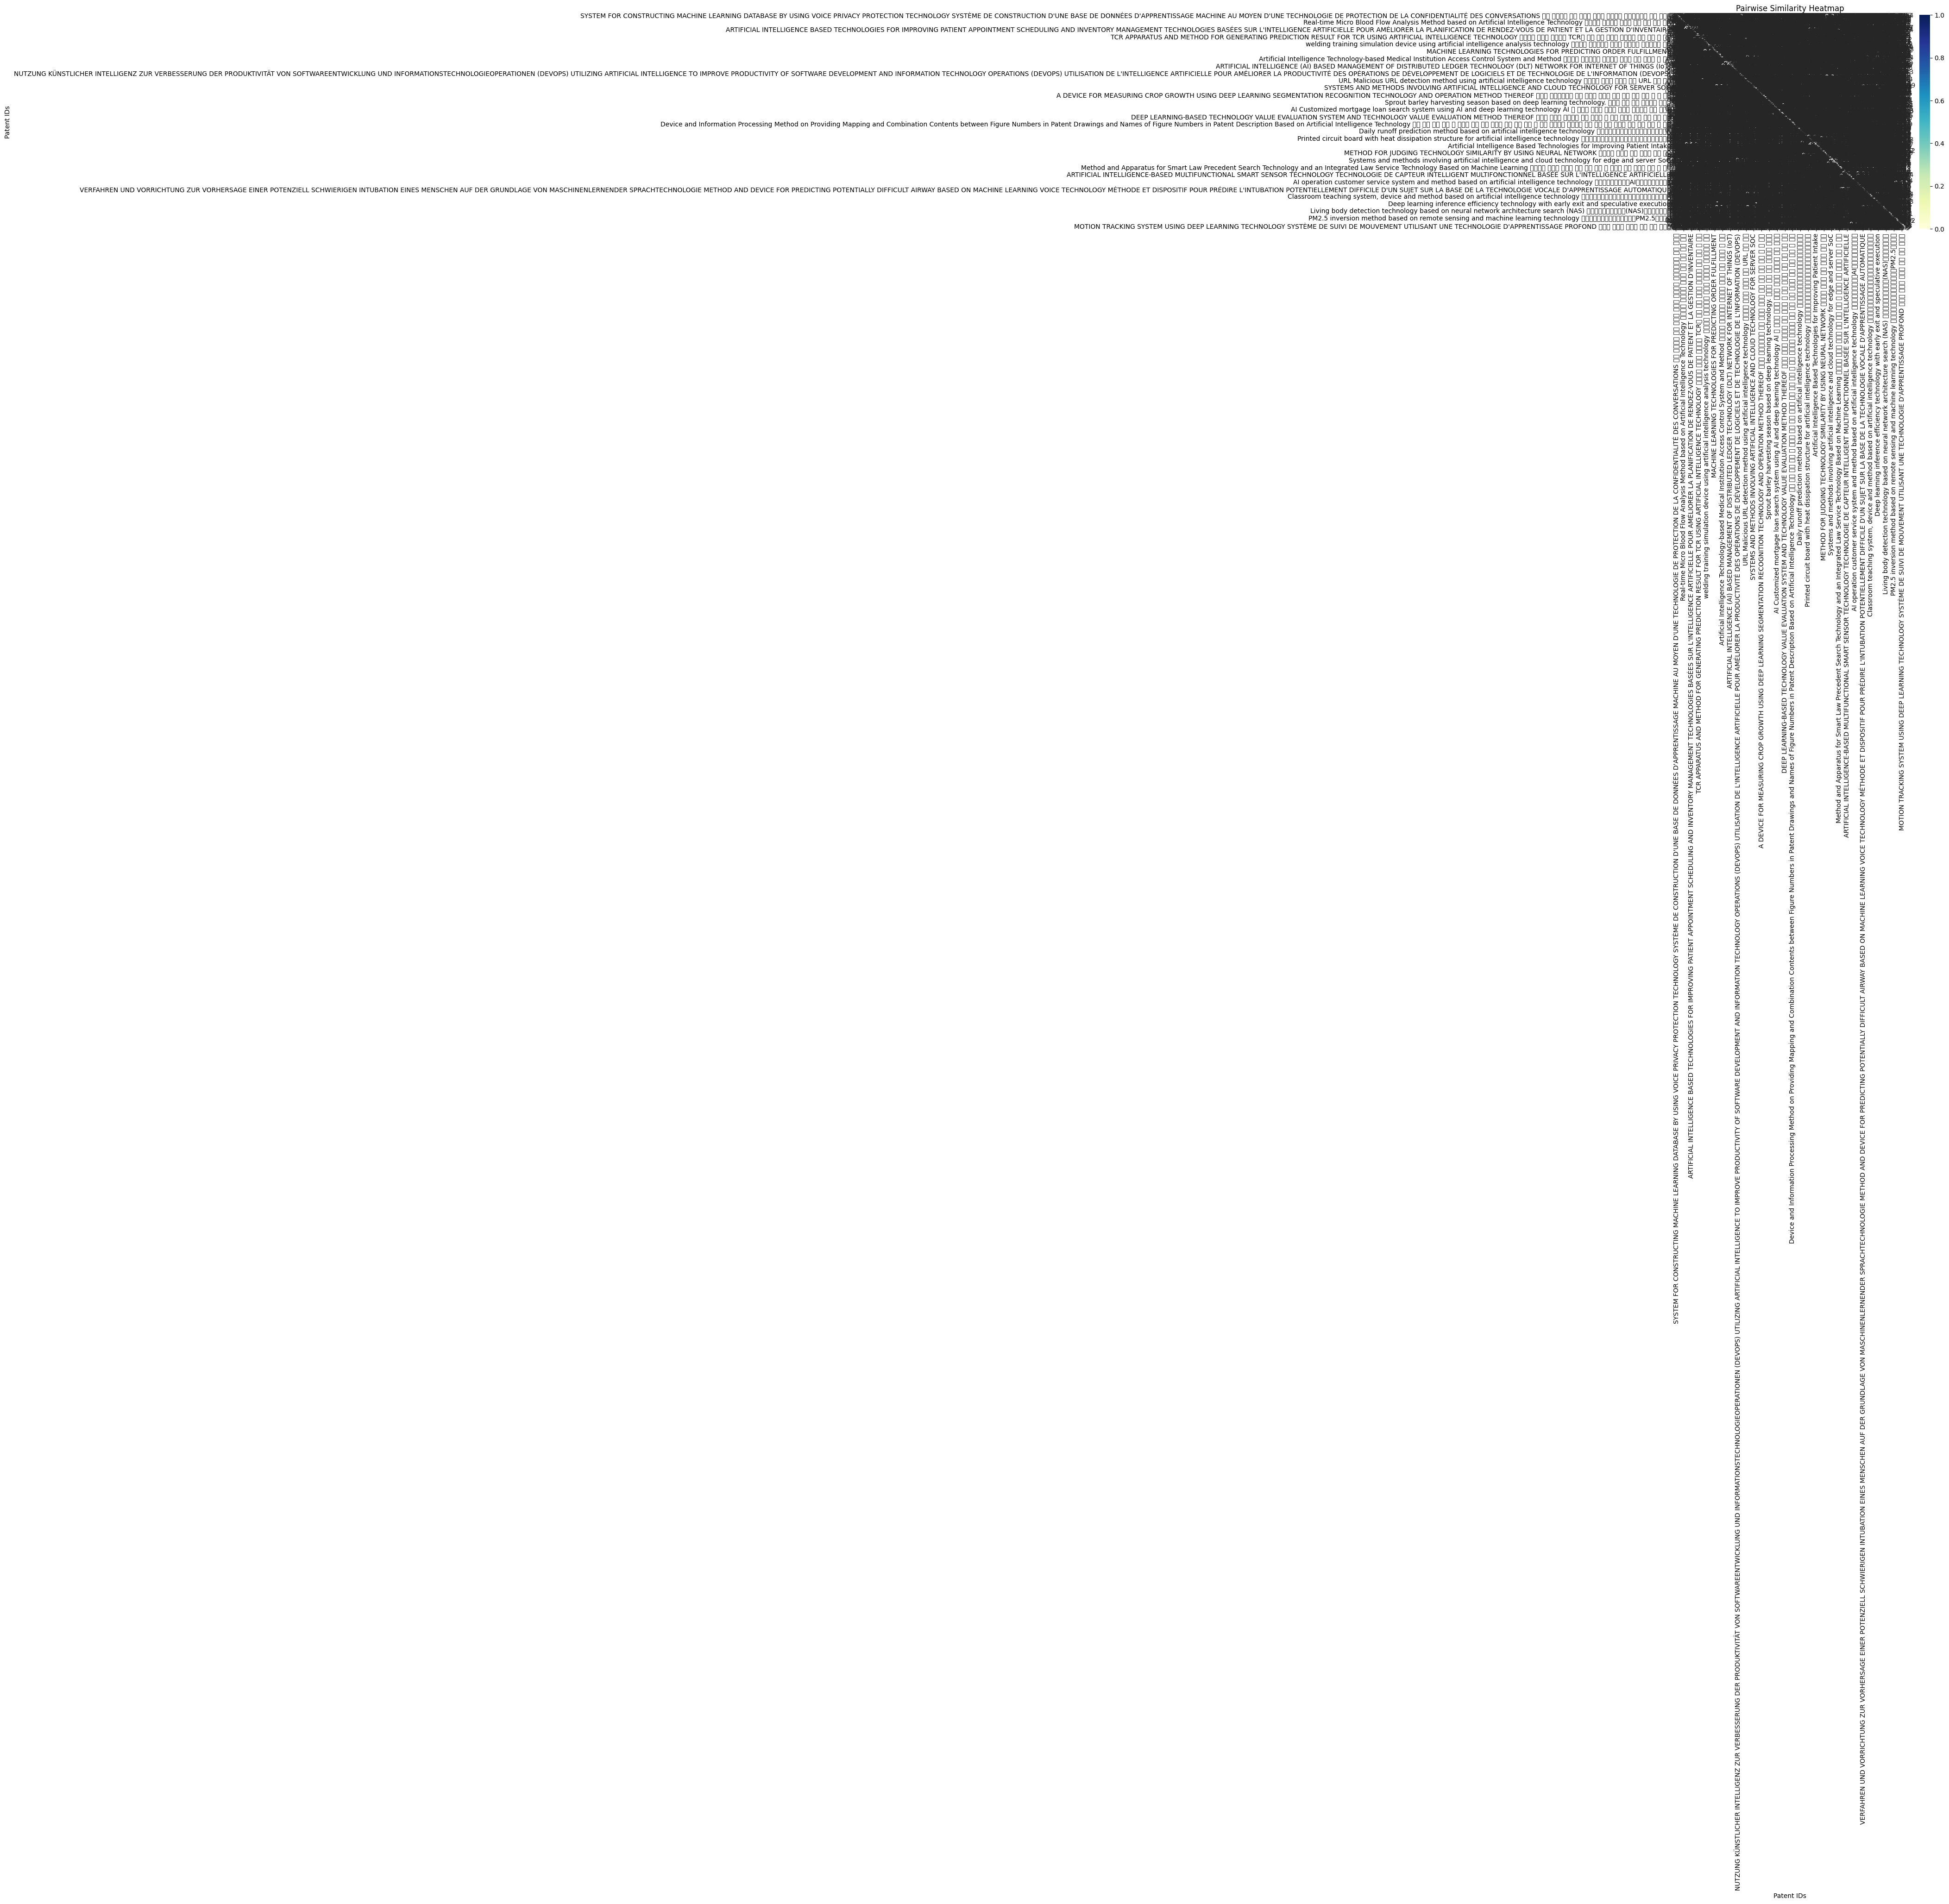

In [ ]:
import seaborn as sns

similarity_df = pd.DataFrame(similarities, columns=filtered_df['biblio_invention_title_text'], index=filtered_df['biblio_invention_title_text'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pairwise Similarity Heatmap")
plt.xlabel("Patent IDs")
plt.ylabel("Patent IDs")

# Show the heatmap
plt.show()

In [ ]:
similarity_df

biblio_invention_title_text,SYSTEM FOR CONSTRUCTING MACHINE LEARNING DATABASE BY USING VOICE PRIVACY PROTECTION TECHNOLOGY SYSTÈME DE CONSTRUCTION D'UNE BASE DE DONNÉES D'APPRENTISSAGE MACHINE AU MOYEN D'UNE TECHNOLOGIE DE PROTECTION DE LA CONFIDENTIALITÉ DES CONVERSATIONS 음성 개인정보 보호 기술을 이용한 기계학습 데이터베이스 구축 시스템,SYSTEMS AND METHODS INVOLVING ARTIFICIAL INTELLIGENCE AND CLOUD TECHNOLOGY FOR EDGE AND SERVER SOC,NEURAL NETWORK UTILIZATION WITH ULTRASOUND TECHNOLOGY,Technologies for intra-operative ligament balancing using machine learning,Precision treatment with machine learning and digital twin technology for optimal metabolic outcomes,TECHNOLOGY TO CONDUCT POWER-EFFICIENT MACHINE LEARNING FOR IMAGES AND VIDEO,Real-time Micro Blood Flow Analysis Method based on Artificial Intelligence Technology 인공지능 기술기반 실시간 미세 혈류 분석 방법,Defective product sorting device and sorting method based on deep learning technology 딥러닝 기술 기반의 불량품 선별 시스템 및 방법,SEM TEM 3D Method for 3D modeling a microscope image or SEM or TEM image for semiconductor research using deep learning technology and an electronic apparatus including the same 딥러닝 기술을 이용한 반도체 연구용 현미경 이미지 또는 SEM 또는 TEM 이미지 3D 모델링 방법 및 이를 포함하는 전자 장치,The prediction system for start-up market size and growth potential based on artificial intelligence technology 인공지능 기반의 창업분야 시장규모 및 성장잠재력 예측 시스템,...,Intelligent home control host based on artificial intelligence technology 基于人工智能技术的智能家居控制主机,PM2.5 inversion method based on remote sensing and machine learning technology 一种基于遥感和机器学习技术的PM2.5反演方法,Control and management System for biosecurity of livestock farms based on deep learning image preocessing technology 딥러닝 이미지처리 기술에 기반한 축산농장 차단 방역 통제 관리시스템,Pig population counting method and device using deep learning continued image processing technology 딥러닝 연속된 이미지처리기술을 이용한 양돈 개체수 파악방법 및 장치,Service-oriented robot based on artificial intelligence technology and control system 一种基于人工智能技术的服务型机器人及控制系统,Measurement and control device for artificial intelligence technology data equipment 一种人工智能技术数据设备测控装置,Electric power facility inspection system based on artificial intelligence and Beidou technology 一种基于人工智能与北斗技术的电力设施巡视系统,MOTION TRACKING SYSTEM USING DEEP LEARNING TECHNOLOGY SYSTÈME DE SUIVI DE MOUVEMENT UTILISANT UNE TECHNOLOGIE D'APPRENTISSAGE PROFOND 딥러닝 기술을 이용한 모션 추적 시스템,Complex wavefront detection technology based on phase difference method and deep neural network 基于相位差法和深度神经网络的复杂波前探测技术,Artificial intelligence image processing method and system based on block processing technology 一种基于按块处理技术的人工智能图像处理方法及系统
biblio_invention_title_text,,,,,,,,,,,,,,,,,,,,,
SYSTEM FOR CONSTRUCTING MACHINE LEARNING DATABASE BY USING VOICE PRIVACY PROTECTION TECHNOLOGY SYSTÈME DE CONSTRUCTION D'UNE BASE DE DONNÉES D'APPRENTISSAGE MACHINE AU MOYEN D'UNE TECHNOLOGIE DE PROTECTION DE LA CONFIDENTIALITÉ DES CONVERSATIONS 음성 개인정보 보호 기술을 이용한 기계학습 데이터베이스 구축 시스템,1.000000,0.054096,0.065446,0.046446,0.047227,0.032412,0.010205,0.010873,0.021462,0.049702,...,0.053714,0.059302,0.004098,0.007648,0.088080,0.037468,0.036003,0.484773,0.052707,0.053588
SYSTEMS AND METHODS INVOLVING ARTIFICIAL INTELLIGENCE AND CLOUD TECHNOLOGY FOR EDGE AND SERVER SOC,0.054096,1.000000,0.312829,0.299732,0.170363,0.098160,0.000000,0.000000,0.000000,0.000000,...,0.159711,0.188010,0.000000,0.001416,0.171078,0.113394,0.129028,0.124993,0.233545,0.304643
NEURAL NETWORK UTILIZATION WITH ULTRASOUND TECHNOLOGY,0.065446,0.312829,1.000000,0.280304,0.177952,0.182046,0.000000,0.000000,0.000000,0.000000,...,0.227608,0.204698,0.000000,0.000000,0.235446,0.162143,0.163571,0.105898,0.238257,0.285933
Technologies for intra-operative ligament balancing using machine learning,0.046446,0.299732,0.280304,1.000000,0.253658,0.092717,0.000000,0.000000,0.000000,0.000000,...,0.154856,0.149736,0.000000,0.003083,0.147214,0.098577,0.117763,0.077291,0.134003,0.153413
Precision treatment with machine learning and digital twin technology for optimal metabolic outcomes,0.047227,0.170363,0.177952,0.253658,1.000000

In [ ]:
import numpy as np

# Set a threshold for similarity
threshold = 0.1

# Create a mask for pairs of patents with similarity above the threshold
similarity_mask = np.where(similarities > threshold, 1, 0)

# Iterate through the pairs and print similar patents
for i in range(similarity_mask.shape[0]):
    for j in range(i + 1, similarity_mask.shape[1]):
        if similarity_mask[i, j] == 1:
            print(f"Patent {i} is similar to Patent {j} (Similarity: {similarities[i, j]:.2f})")


Patent 0 is similar to Patent 10 (Similarity: 0.62)
Patent 0 is similar to Patent 12 (Similarity: 0.44)
Patent 0 is similar to Patent 26 (Similarity: 0.23)
Patent 0 is similar to Patent 40 (Similarity: 0.35)
Patent 0 is similar to Patent 52 (Similarity: 0.31)
Patent 0 is similar to Patent 64 (Similarity: 0.45)
Patent 0 is similar to Patent 71 (Similarity: 0.33)
Patent 0 is similar to Patent 107 (Similarity: 0.43)
Patent 0 is similar to Patent 127 (Similarity: 0.12)
Patent 0 is similar to Patent 128 (Similarity: 0.33)
Patent 0 is similar to Patent 131 (Similarity: 0.17)
Patent 0 is similar to Patent 132 (Similarity: 0.36)
Patent 0 is similar to Patent 133 (Similarity: 0.14)
Patent 0 is similar to Patent 144 (Similarity: 0.16)
Patent 0 is similar to Patent 174 (Similarity: 0.48)
Patent 1 is similar to Patent 2 (Similarity: 0.31)
Patent 1 is similar to Patent 3 (Similarity: 0.30)
Patent 1 is similar to Patent 4 (Similarity: 0.17)
Patent 1 is similar to Patent 11 (Similarity: 0.12)
Patent 

In [ ]:
# Initialize a dictionary to store the count of similar patents for each patent
similar_patent_counts = {}

# Iterate through the patents
for i in range(similarity_mask.shape[0]):
    # Count the number of similar patents for the current patent (excluding itself)
    similar_count = np.sum(similarity_mask[i]) - 1  # Subtract 1 to exclude self-similarity
    # Store the count in the dictionary with the patent ID as the key
    similar_patent_counts[f"Patent {i}"] = similar_count

# Print the counts of similar patents for each patent
for patent, count in similar_patent_counts.items():
    print(f"{patent} is similar to {count} patents")


Patent 0 is similar to 15 patents
Patent 1 is similar to 94 patents
Patent 2 is similar to 95 patents
Patent 3 is similar to 80 patents
Patent 4 is similar to 73 patents
Patent 5 is similar to 42 patents
Patent 6 is similar to 1 patents
Patent 7 is similar to 4 patents
Patent 8 is similar to 3 patents
Patent 9 is similar to 28 patents
Patent 10 is similar to 14 patents
Patent 11 is similar to 86 patents
Patent 12 is similar to 14 patents
Patent 13 is similar to 8 patents
Patent 14 is similar to 2 patents
Patent 15 is similar to 77 patents
Patent 16 is similar to 26 patents
Patent 17 is similar to 88 patents
Patent 18 is similar to 32 patents
Patent 19 is similar to 1 patents
Patent 20 is similar to 28 patents
Patent 21 is similar to 3 patents
Patent 22 is similar to 65 patents
Patent 23 is similar to 13 patents
Patent 24 is similar to 4 patents
Patent 25 is similar to 79 patents
Patent 26 is similar to 16 patents
Patent 27 is similar to -1 patents
Patent 28 is similar to 27 patents
Pat

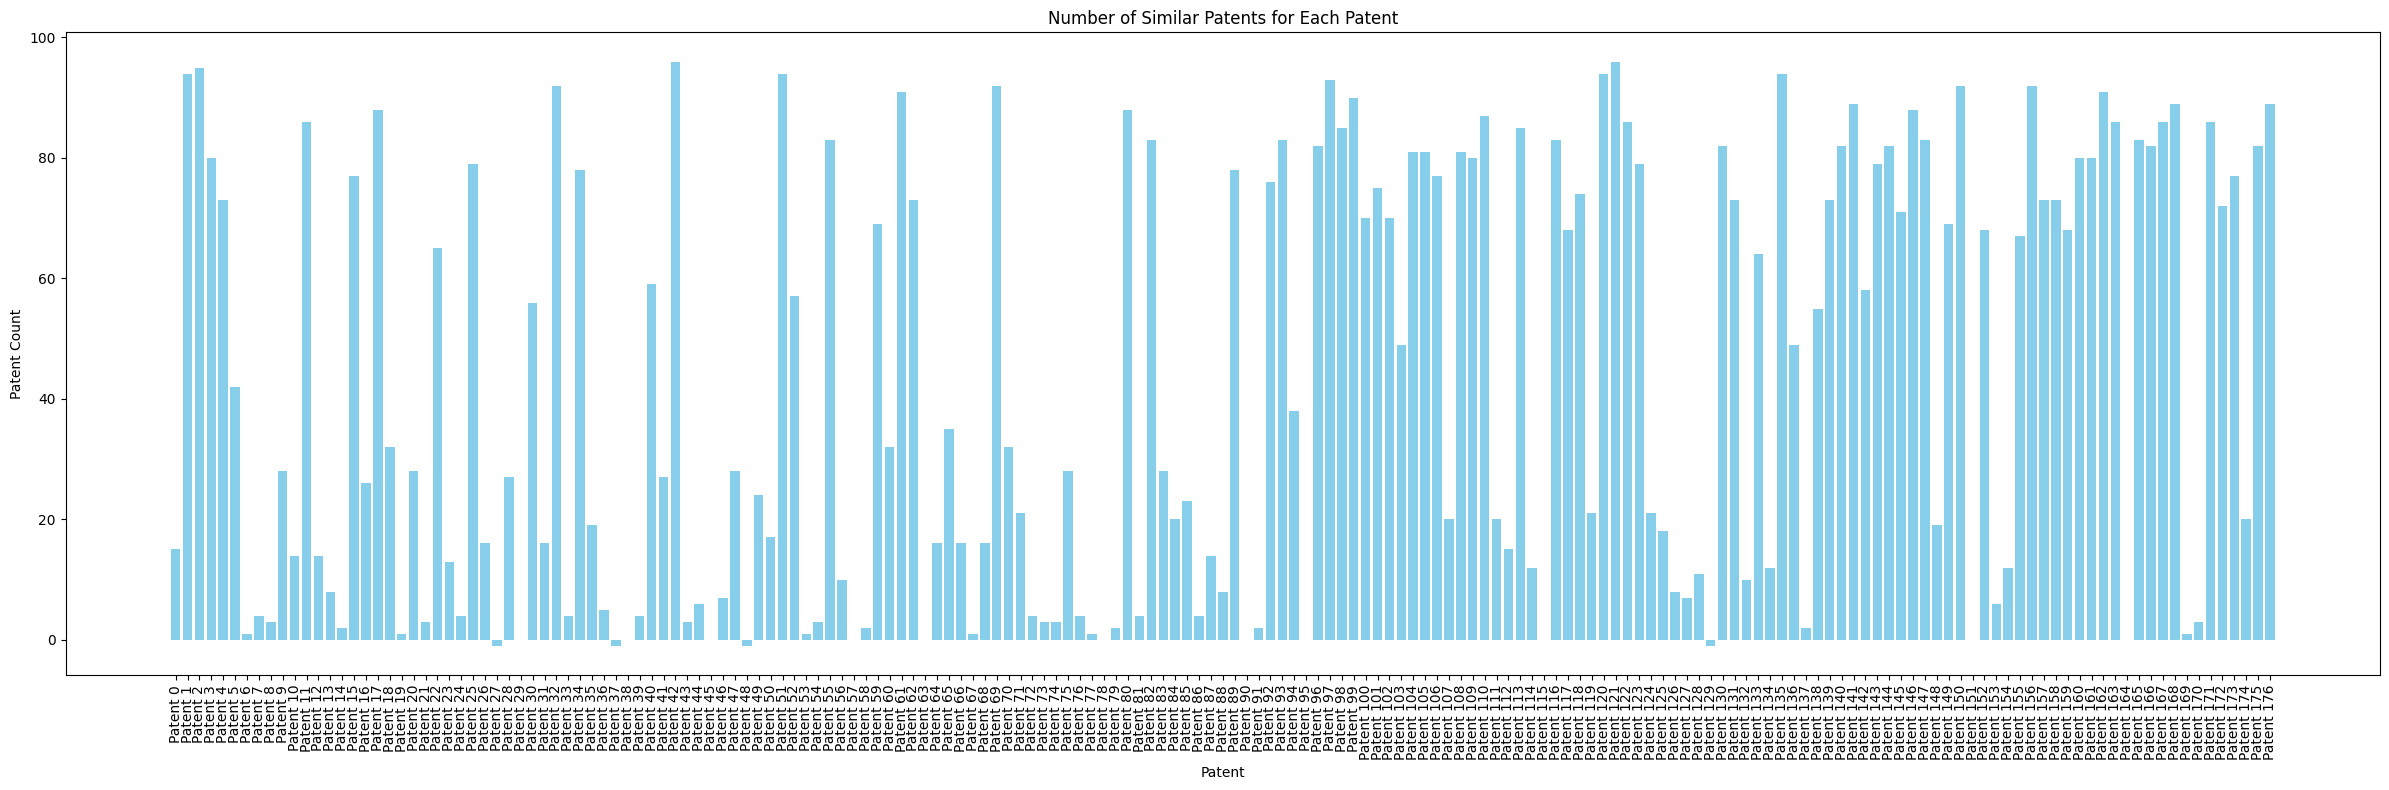

In [ ]:
# Data for the bar chart
patents = list(similar_patent_counts.keys())
counts = list(similar_patent_counts.values())

# Create a larger vertical bar chart
plt.figure(figsize=(24, 8))
plt.bar(patents, counts, color='skyblue')
plt.xlabel('Patent')
plt.ylabel('Patent Count')
plt.title('Number of Similar Patents for Each Patent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the bar chart
plt.tight_layout()
plt.show()

In [ ]:
# Sort the similar_patent_counts dictionary by counts in descending order
sorted_counts = sorted(similar_patent_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top patents with the highest counts
top_patents = sorted_counts[:10]

# Print the top patents and their counts
for patent, count in top_patents:
    print(f"Patent: {patent}, Count: {count}")


Patent: Patent 42, Count: 96
Patent: Patent 121, Count: 96
Patent: Patent 2, Count: 95
Patent: Patent 1, Count: 94
Patent: Patent 51, Count: 94
Patent: Patent 120, Count: 94
Patent: Patent 135, Count: 94
Patent: Patent 97, Count: 93
Patent: Patent 32, Count: 92
Patent: Patent 69, Count: 92


In [ ]:
pip install python-louvain

In [ ]:
from networkx.algorithms import community

# Detect communities using the greedy modularity approach
communities = community.greedy_modularity_communities(G_undirected)

# Convert the communities to a dictionary for easy lookup
community_dict = {node: comm_idx for comm_idx, comm in enumerate(communities) for node in comm}

# Assign a color to each node based on its community
node_colors = [community_dict[node] for node in G_undirected.nodes()]

# Now, you can use node_colors as the color attribute in your network visualization

In [ ]:
import networkx as nx
import plotly.graph_objects as go

# Create a network graph
G = nx.Graph()
num_patents = len(similarities)
patent_ids = filtered_df.index.tolist()
# Add nodes and edges based on the pairwise similarities
for i in range(num_patents):
    for j in range(i + 1, num_patents):
        if similarities[i][j] > 0.1:
            G.add_edge(patent_ids[i], patent_ids[j], weight=similarities[i][j])

# Use the spring layout for node positioning
pos = nx.spring_layout(G, seed=42)

# Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create node traces
node_x = []
node_y = []
node_text = []  # To store node labels for hover information

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f'Patent ID: {node}<br>Neighbors: {len(list(G.neighbors(node)))}')

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(thickness=15, title='Node Connections'),
        line_width=2),
    text=node_text)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Show the interactive network graph
fig.show()
